# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

# Data import

In [2]:
data = pd.read_json('../raw_data/kaggle_data_2.json')

In [3]:
data.tail(20)

,dataset_name,table_name,column_name,label,column_values,column_values_unique,n_unique_values,unique_value_counts,n_values,mean,std,median,skew,kurt,shapiro_wilk_test
51692,census/e-commerce-retail-sales-series-data-col...,ECOMPCTSA.csv,value,NaN,"0.6, 0.8, 0.9, 1.0, 1.0, 1.1, 1.1, 1.1, 1.2, 1...","[0.6000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2, ...",68,"{'3.6': 4, '1.1': 3, '1.0': 2, '5.6': 2, '4.6'...",80,4.67500,2.918882,4.10,0.549997,-0.758466,6.472432e-04
51693,census/e-commerce-retail-sales-series-data-col...,ECOMNSA.csv,realtime_start,NaN,"2019-12-06, 2019-12-06, 2019-12-06, 2019-12-06...",[2019-12-06],1,{'2019-12-06': 80},80,NaN,NaN,NaN,NaN,NaN,NaN
51694,census/e-commerce-retail-sales-series-data-col...,ECOMNSA.csv,realtime_end,NaN,"2019-12-06, 2019-12-06, 2019-12-06, 2019-12-06...",[2019-12-06],1,{'2019-12-06': 80},80,NaN,NaN,NaN,NaN,NaN,NaN
51695,census/e-commerce-retail-sales-series-data-col...,ECOMNSA.csv,date,NaN,"1999-10-01, 2000-01-01, 2000-04-01, 2000-07-01...","[1999-10-01, 2000-01-01, 2000-04-01, 2000-07-0...",80,"{'1999-10-01': 1, '2000-01-01': 1, '2014-04-01...",80,NaN,NaN,NaN,NaN,NaN,NaN
51696,census/e-commerce-retail-sales-series-data-col...,ECOMNSA.csv,value,NaN,"5241.0, 5553.0, 6059.0, 6892.0, 9104.0, 7923.0...","[5241.0, 5553.0, 6059.0, 6892.0, 9104.0, 7923....",80,"{'5241.0': 1, '5553.0': 1, '69715.0': 1, '6614...",80,52273.78750,40678.184514,39021.50,0.902162,-0.146911,1.027040e-05
51697,census/e-commerce-retail-sales-series-data-col...,ECOMPCTNSA.csv,realtime_start,NaN,"2019-12-06, 2019-12-06, 2019-12-06, 2019-12-06...",[2019-12-06],1,{'2019-12-06': 80},80,NaN,NaN,NaN,NaN,NaN,NaN
51698,census/e-commerce-retail-sales-series-data-col...,ECOMPCTNSA.csv,realtime_end,NaN,"2019-12-06, 2019-12-06, 2019-12-06, 2019-12-06...",[2019-12-06],1,{'2019-12-06': 80},80,NaN,NaN,NaN,NaN,NaN,NaN
51699,census/e-commerce-retail-sales-series-data-col...,ECOMPCTNSA.csv,date,NaN,"1999-10-01, 2000-01-01, 2000-04-01, 2000-07-01...","[1999-10-01, 2000-01-01, 2000-04-01, 2000-07-0...",80,"{'1999-10-01': 1, '2000-01-01': 1, '2014-04-01...",80,NaN,NaN,NaN,NaN,NaN,NaN
51700,census/e-commerce-retail-sales-series-data-col...,ECOMPCTNSA.csv,value,NaN,"0.7, 0.8, 0.8, 0.9, 1.2, 1.1, 1.0, 1.0, 1.3, 1...","[0.7000000000000001, 0.8, 0.9, 1.2, 1.1, 1.0, ...",61,"{'1.7': 3, '3.3': 3, '2.4': 3, '1.3': 3, '8.6'...",80,4.65625,2.920501,4.05,0.572176,-0.714729,5.965166e-04
51701,census/e-commerce-retail-sales-series-data-col...,ECOMSA.csv,realtime_start,NaN,"2019-12-06, 2019-12-06, 2019-12-06, 2019-12-06...",[2019-12-06],1,{'2019-12-06': 80},80,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.shape

(51712, 15)

In [10]:
data['column_values_unique'][16]


['74 - 84KG',
 '4X400M Relay',
 '1500M',
 '200M',
 'Rugby',
 'Football',
 '4X200M Freestyle Relay',
 'Coxless Pair (2-)',
 '67 - 71KG (Light-Middleweight)',
 'Long Jump',
 '10M',
 'Synchronized Diving 10M Platform',
 'Team Competition',
 'Volleyball',
 'Decathlon',
 'Water Polo',
 'Single Sculls (1X)',
 'Team Pursuit (4000M)',
 'Baseball',
 'Eight With Coxswain (8+)',
 'Uneven Bars',
 '100 - 110KG, Total (Heavyweight)',
 'Hockey',
 '70 - 80KG (Middleweight)',
 'Basketball',
 '3000M Team',
 '300M Free Rifle, Prone, Team',
 'Floor Exercises',
 '10000M Walk',
 'Two-Person Keelboat Open (Star)',
 '48 - 55KG',
 'Team Time Trial',
 '82.5 - 90KG, Total (Middle-Heavyweight)',
 'Handball',
 'High Jump',
 'Lacrosse',
 '82 - 90KG (Light-Heavyweight)',
 'Shot Put',
 'Moving Bird Target 33M Teams',
 'Eight With Coxswain',
 'Pommel Horse',
 '48 - 54KG',
 '200M Breaststroke',
 '+ 91KG (Super Heavyweight)',
 '90 - 100KG (Heavyweight)',
 'Sabre Team',
 'Singles',
 'Wf 74 KG',
 'Individual',
 'Four-Oare

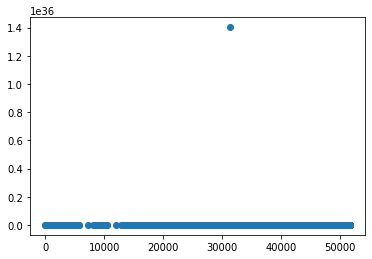

In [18]:
plt.scatter(range(len(data)),data['mean'])

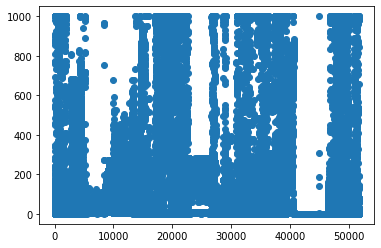

In [20]:
plt.scatter(range(len(data)),data['n_unique_values'])

In [22]:
data['n_unique_values'][2020]

28

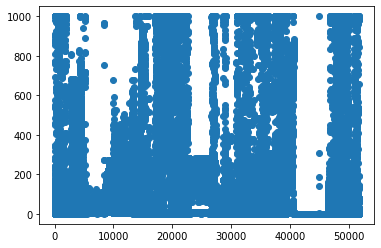

In [24]:
plt.scatter(range(len(data)),data['n_unique_values'])

<AxesSubplot:>

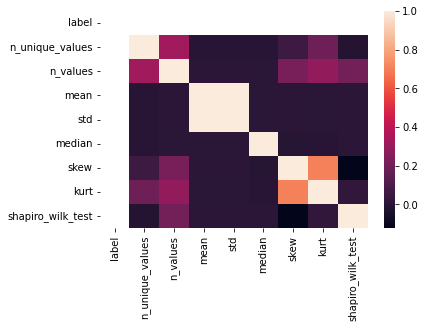

In [25]:
sns.heatmap(data.corr())

<AxesSubplot:ylabel='n_unique_values'>

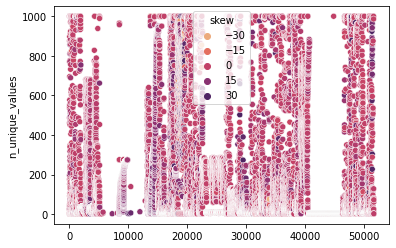

In [27]:
sns.scatterplot(data=data, x=range(len(data)), y='n_unique_values', hue="skew",palette='flare')

In [32]:
data_k_means = data.drop(columns=['dataset_name','table_name','column_name',
                                  'label','column_values','shapiro_wilk_test'])

In [33]:
data_k_means.head()

,column_values_unique,n_unique_values,unique_value_counts,n_values,mean,std,median,skew,kurt
0,"[1984, 1976, 1956, 1988, 1952, 2014, 1972, 199...",22,"{'2006': 106, '2014': 103, '2010': 98, '1998':...",1000,1986.952,23.931285,1994.0,-0.970234,0.102204
1,"[Calgary, Salt Lake City, Innsbruck, Nagano, L...",19,"{'Turin': 110, 'Sochi': 105, 'Vancouver': 100,...",1000,NaN,NaN,NaN,NaN,NaN
2,"[Skiing, Ice Hockey, Biathlon, Skating, Luge, ...",7,"{'Skiing': 306, 'Ice Hockey': 268, 'Skating': ...",1000,NaN,NaN,NaN,NaN,NaN
3,"[Cross Country Skiing, Ice Hockey, Nordic Comb...",15,"{'Ice Hockey': 270, 'Cross Country Skiing': 13...",1000,NaN,NaN,NaN,NaN,NaN
4,"[PORTER, John Chester, WILKES, Debbi, BELLAMY,...",906,"{'GOTTWALD, Felix': 4, 'BJOERNDALEN, Ole Einar...",1000,NaN,NaN,NaN,NaN,NaN


# Drop rows with text data

In [38]:
num_col = data_k_means['column_values_unique'].apply(lambda x: float(x[0]) if str(x[0]).isdigit() else None)

In [49]:
np.isnan(num_col)

0        False
1         True
2         True
3         True
4         True
         ...  
51707    False
51708     True
51709     True
51710     True
51711     True
Name: column_values_unique, Length: 51712, dtype: bool

In [51]:
num_data_k_means = data_k_means[np.isnan(num_col) == False]

# KMeans with 6 Clusters

In [184]:
#data_k_means = data_k_means.fillna(0)

In [185]:
#data_k_means = data_k_means.replace([np.inf, -np.inf],999999999999 )

In [52]:
num_data_k_means.describe()

,n_unique_values,n_values,mean,std,median,skew,kurt
count,17518.000000,17518.000000,1.719300e+04,1.719300e+04,1.721200e+04,17211.000000,17198.000000
mean,122.778913,497.477052,-1.986378e+13,3.135097e+14,-1.053579e+14,5.145894,69.606016
std,232.581460,443.552467,6.222899e+16,3.434921e+16,7.269202e+16,6.061835,138.696252
min,1.000000,2.000000,-7.740582e+18,0.000000e+00,-9.182946e+18,-31.529440,-6.000000
25%,2.000000,18.000000,5.555556e-02,2.357023e-01,0.000000e+00,0.558158,0.136607
50%,16.000000,280.000000,9.063000e+00,6.995309e+00,2.000000e+00,3.231987,13.680948
75%,126.000000,1000.000000,1.057206e+03,9.803709e+02,1.555000e+02,8.425263,81.218624
max,1000.000000,1000.000000,1.372614e+18,4.476408e+18,1.361974e+18,31.622777,1000.000000


In [53]:
k_means_5_model = KMeans(n_clusters=6, max_iter=1000)
k_means_5_model.fit(num_data_k_means)

ValueError: setting an array element with a sequence.

In [188]:
pd.DataFrame(k_means_5_model.labels_).value_counts()

0    14919
4       97
3        2
5        2
1        1
2        1
dtype: int64

In [189]:
pd.DataFrame(k_means_5_model.labels_).value_counts()[1]/len(data)

6.656903208627346e-05

# KMeans with 6 Clusters and Standard Scaled data

In [190]:
standard_scaler = StandardScaler()
standard_scaler.fit(data_k_means)
data_k_means_scaled = data_k_means
data_k_means_scaled = standard_scaler.transform(data_k_means_scaled)

In [191]:
data_k_means_scaled

array([[-0.5777612 , -0.01927035, -0.01017201, ..., -0.4942136 ,
        -0.44158255, -0.44243404],
       [-0.71800158, -0.01927035, -0.01017201, ..., -0.57827955,
        -0.44687116, -0.4579123 ],
       [-0.71080977, -0.01927035, -0.01017201, ..., -0.39611117,
        -0.44567675, -0.4579123 ],
       ...,
       [-0.71800158, -0.01927035, -0.01017201, ...,  4.04908203,
         5.85184472, -0.4579123 ],
       [ 1.25615155, -0.01927031, -0.01017201, ..., -0.24175567,
        -0.41533316, -0.4579123 ],
       [-0.7251934 , -0.01927035, -0.01017201, ..., -0.46531042,
        -0.43817231,  2.21066701]])

In [192]:
k_means_6_model_scaled = KMeans(n_clusters=6, max_iter=1000)
k_means_6_model_scaled.fit(data_k_means_scaled)

KMeans(max_iter=1000, n_clusters=6)

In [193]:
k_means_6_model_scaled.labels_

array([0, 0, 0, ..., 2, 5, 3], dtype=int32)

In [194]:
pd.DataFrame(k_means_6_model_scaled.labels_).value_counts()

0    9003
5    3178
3    2028
2     778
4      34
1       1
dtype: int64

In [195]:
len(pd.DataFrame(k_means_6_model_scaled.labels_))

15022

In [196]:
len(data)

15022

In [197]:
data['pred_from_cluster'] = k_means_6_model_scaled.labels_

In [198]:
data

,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,mean,std,median,skew,kurt,shapiro_wilk_test,pred_from_cluster
0,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,age,NaN,"['63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, ...",[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 ...,41,54.366337,9.082101,55.0,-0.202463,-0.542167,5.800190e-03,0
1,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,sex,NaN,"['1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,...",[1 0],2,0.683168,0.466011,1.0,-0.791335,-1.382961,2.750313e-26,0
2,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,cp,NaN,"['3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3,...",[3 2 1 0],4,0.966997,1.032052,1.0,0.484732,-1.193071,1.857026e-19,0
3,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,trestbps,NaN,"['145, 130, 130, 120, 120, 140, 140, 120, 172,...",[145 130 120 140 172 150 110 135 160 105 125 1...,49,131.623762,17.538143,130.0,0.713768,0.929054,1.458000e-06,0
4,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,chol,NaN,"['233, 250, 204, 236, 354, 192, 294, 263, 199,...",[233 250 204 236 354 192 294 263 199 168 239 2...,152,246.264026,51.830751,240.0,1.143401,4.505423,5.364669e-09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15017,divyansh22/flight-delay-prediction,Jan_2019_ontime.csv,ARR_DEL15,NaN,"['0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0,...",[ 0. 1. nan],2,0.216718,0.412222,0.0,1.377257,-0.103382,1.000000e+00,3
15018,divyansh22/flight-delay-prediction,Jan_2019_ontime.csv,CANCELLED,NaN,"['0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[0. 1.],2,0.034000,0.181320,0.0,5.150390,24.575662,0.000000e+00,0
15019,divyansh22/flight-delay-prediction,Jan_2019_ontime.csv,DIVERTED,NaN,"['0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[0. 1.],2,0.001000,0.031623,0.0,31.622777,1000.000000,0.000000e+00,2
15020,divyansh22/flight-delay-prediction,Jan_2019_ontime.csv,DISTANCE,NaN,"['77.0, 935.0, 1024.0, 288.0, 1246.0, 119.0, 5...",[ 77. 935. 1024. 288. 1246. 119. 524. 38...,551,824.004000,601.881579,675.0,1.565974,3.631016,5.412346e-28,5


# Compare to labeled data

In [40]:
labeled_data = pd.read_csv('../raw_data/merged_labeled_data.csv')

In [41]:
labeled_data.head()

,dataset_name,table_name,column_name,label,column_values,column_values_unique,nunique_values,n_values,mean,std,median,skew,kurt,shapiro_wilk_test
0,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,thalach,int,"['150, 187, 172, 178, 163, 148, 153, 173, 162,...",[150 187 172 178 163 148 153 173 162 174 160 1...,91.0,303.0,149.6468647,22.905161,153.00000,-0.537410,-0.061970,0.000066
1,kimjihoo/coronavirusdataset,SearchTrend.csv,coronavirus,float,"['0.00736, 0.00436, 0.00927, 0.01181, 0.00563,...",[7.360000e-03 4.360000e-03 9.270000e-03 1.1810...,326.0,1000.0,2.0906601,10.010559,0.00881,6.305825,42.379589,0.000000
2,kimjihoo/coronavirusdataset,Weather.csv,province,cat-multi,"['Daegu, Chungcheongbuk-do, Incheon, Ulsan, Bu...",['Daegu' 'Chungcheongbuk-do' 'Incheon' 'Ulsan'...,16.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,kimjihoo/coronavirusdataset,PatientInfo.csv,age,cat-multi,"['50s, 30s, 40s, nan, nan, 10s, 20s, 20s, 50s,...",['50s' '30s' '40s' nan '10s' '20s' '70s' '80s'...,10.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,kimjihoo/coronavirusdataset,Policy.csv,policy_id,int,"['1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...",[ 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...,61.0,61.0,31.0,17.752934,31.00000,0.000000,-1.200000,0.025660


In [42]:
labeled_data = labeled_data[['dataset_name','table_name','column_name','label']]

In [43]:
labeled_data

,dataset_name,table_name,column_name,label
0,nareshbhat/health-care-data-set-on-heart-attac...,heart.csv,thalach,int
1,kimjihoo/coronavirusdataset,SearchTrend.csv,coronavirus,float
2,kimjihoo/coronavirusdataset,Weather.csv,province,cat-multi
3,kimjihoo/coronavirusdataset,PatientInfo.csv,age,cat-multi
4,kimjihoo/coronavirusdataset,Policy.csv,policy_id,int
...,...,...,...,...
2495,bigquery-public-data,cms_medicare.nursing_facilities_2014,distinct_beneficiaries_per_provider,int
2496,bigquery-public-data,world_bank_wdi.country_summary,vital_registration_complete,cat-multi
2497,bigquery-public-data,sdoh_hrsa_shortage_areas.hpsa_mental_health,Common_State_Name,cat-multi
2498,bigquery-public-data,sunroof_solar.solar_potential_by_censustract,lat_max,float


In [44]:

#for index_lab, row_lab in labeled_data.iterrows():
#    for index_data, row_data in data.iterrows():
 #       if row_lab['dataset_name'] == row_data['dataset_name'] and row_lab['table_name'] == row_data['table_name'] and row_lab['column_name'] == row_data['column_name']:
 #           row_data['label'] = row_lab['label'][index_lab]
#data.merge(labeled_data, how='left', on=['dataset_name','table_name','column_name'])
data_merged = pd.merge(data,labeled_data, how='left', on=['dataset_name','table_name','column_name'])



In [45]:
data_merged['label_x'] = data_merged['label_y']

In [46]:
data_merged.drop(columns='label_y')

,dataset_name,table_name,column_name,label_x,column_values,column_values_unique,n_unique_values,unique_value_counts,n_values,mean,std,median,skew,kurt,shapiro_wilk_test
0,the-guardian/olympic-games,winter.csv,Year,NaN,"1984, 1976, 1956, 1988, 1952, 2014, 1972, 1992...","[1984, 1976, 1956, 1988, 1952, 2014, 1972, 199...",22,"{'2006': 106, '2014': 103, '2010': 98, '1998':...",1000,1986.952,23.931285,1994.0,-0.970234,0.102204,6.652302e-26
1,the-guardian/olympic-games,winter.csv,City,NaN,"Calgary, Salt Lake City, Innsbruck, Innsbruck,...","[Calgary, Salt Lake City, Innsbruck, Nagano, L...",19,"{'Turin': 110, 'Sochi': 105, 'Vancouver': 100,...",1000,NaN,NaN,NaN,NaN,NaN,NaN
2,the-guardian/olympic-games,winter.csv,Sport,cat-multi,"Skiing, Skiing, Ice Hockey, Biathlon, Skating,...","[Skiing, Ice Hockey, Biathlon, Skating, Luge, ...",7,"{'Skiing': 306, 'Ice Hockey': 268, 'Skating': ...",1000,NaN,NaN,NaN,NaN,NaN,NaN
3,the-guardian/olympic-games,winter.csv,Discipline,cat-multi,"Cross Country Skiing, Ice Hockey, Cross Countr...","[Cross Country Skiing, Ice Hockey, Nordic Comb...",15,"{'Ice Hockey': 270, 'Cross Country Skiing': 13...",1000,NaN,NaN,NaN,NaN,NaN,NaN
4,the-guardian/olympic-games,winter.csv,Athlete,other,"PORTER, John Chester, WILKES, Debbi, BELLAMY, ...","[PORTER, John Chester, WILKES, Debbi, BELLAMY,...",906,"{'GOTTWALD, Felix': 4, 'BJOERNDALEN, Ole Einar...",1000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51735,unanimad/golden-globe-awards,golden_globe_awards.csv,ceremony,NaN,"45, 47, 35, 41, 66, 50, 43, 59, 76, 77, 68, 41...","[45, 47, 35, 41, 66, 50, 43, 59, 76, 77, 68, 4...",72,"{'64': 25, '58': 24, '36': 23, '45': 22, '50':...",1000,45.964,18.503867,47.0,-0.133466,-0.988897,0.000000e+00
51736,unanimad/golden-globe-awards,golden_globe_awards.csv,category,NaN,"Best Motion Picture - Musical or Comedy, Best ...","[Best Motion Picture - Musical or Comedy, Best...",57,{'Best Performance by an Actor in a Motion Pic...,1000,NaN,NaN,NaN,NaN,NaN,NaN
51737,unanimad/golden-globe-awards,golden_globe_awards.csv,nominee,NaN,"John Williams, George Seaton, Liev Schreiber, ...","[John Williams, George Seaton, Liev Schreiber,...",842,"{'Paul Newman': 6, 'Al Pacino': 6, 'Meryl Stre...",1000,NaN,NaN,NaN,NaN,NaN,NaN
51738,unanimad/golden-globe-awards,golden_globe_awards.csv,film,NaN,"Angels in America, Shaft, nan, Fugitive, The, ...","[Angels in America, Shaft, None, Fugitive, The...",659,"{'Will & Grace': 5, 'L.A. Law': 5, 'Carol Burn...",1000,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data_merged = data_merged.rename(columns={'label_x':'label'})

In [52]:
data_merged = data_merged[data_merged['label'].notna()]

In [53]:
data_merged

,dataset_name,table_name,column_name,label,column_values,column_values_unique,n_unique_values,unique_value_counts,n_values,mean,std,median,skew,kurt,shapiro_wilk_test,label_y
2,the-guardian/olympic-games,winter.csv,Sport,cat-multi,"Skiing, Skiing, Ice Hockey, Biathlon, Skating,...","[Skiing, Ice Hockey, Biathlon, Skating, Luge, ...",7,"{'Skiing': 306, 'Ice Hockey': 268, 'Skating': ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
3,the-guardian/olympic-games,winter.csv,Discipline,cat-multi,"Cross Country Skiing, Ice Hockey, Cross Countr...","[Cross Country Skiing, Ice Hockey, Nordic Comb...",15,"{'Ice Hockey': 270, 'Cross Country Skiing': 13...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
4,the-guardian/olympic-games,winter.csv,Athlete,other,"PORTER, John Chester, WILKES, Debbi, BELLAMY, ...","[PORTER, John Chester, WILKES, Debbi, BELLAMY,...",906,"{'GOTTWALD, Felix': 4, 'BJOERNDALEN, Ole Einar...",1000,NaN,NaN,NaN,NaN,NaN,NaN,other
7,the-guardian/olympic-games,winter.csv,Event,cat-multi,"Ice Hockey, 4X10KM Relay, Ice Hockey, Pairs, 4...","[Ice Hockey, 4X10KM Relay, Pairs, Slalom, Four...",73,"{'Ice Hockey': 254, '4X10KM Relay': 52, '4X7.5...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
8,the-guardian/olympic-games,winter.csv,Medal,cat-multi,"Silver, Bronze, Bronze, Gold, Bronze, Silver, ...","[Silver, Bronze, Gold]",3,"{'Gold': 335, 'Bronze': 334, 'Silver': 331}",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21361,jacobbaruch/basketball-players-stats-per-seaso...,players_stats_by_season_full_details.csv,BLK,int,"7, 2, 2, 13, 28, 6, 0, 4, 23, 20, 31, 6, 2, 19...","[7, 2, 13, 28, 6, 0, 4, 23, 20, 31, 19, 18, 83...",73,"{'0': 136, '1': 122, '2': 88, '3': 76, '4': 65...",1000,10.72,18.58976,5.0,5.088356,38.562032,2.802597e-45,int
21364,jacobbaruch/basketball-players-stats-per-seaso...,players_stats_by_season_full_details.csv,birth_month,cat-multi,"Nov, Nov, Sep, Nov, Mar, Oct, May, Dec, Dec, A...","[Nov, Sep, Mar, Oct, May, Dec, Aug, Jan, Jul, ...",12,"{'Mar': 111, 'Aug': 98, 'Jun': 89, 'Oct': 84, ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
21370,jacobbaruch/basketball-players-stats-per-seaso...,players_stats_by_season_full_details.csv,nationality,cat-multi,"France, United States, United States, Switzerl...","[France, United States, Switzerland, Norway, A...",112,"{'United States': 350, 'Serbia': 49, 'Spain': ...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi
21371,jacobbaruch/basketball-players-stats-per-seaso...,players_stats_by_season_full_details.csv,high_school,cat-multi,"nan, nan, Middleburg Academy, nan, nan, nan, n...","[None, Middleburg Academy, McEachern High Scho...",348,"{'Oak Hill Academy': 7, 'Leuzinger High School...",1000,NaN,NaN,NaN,NaN,NaN,NaN,cat-multi


In [54]:
data_merged.to_csv('../raw_data/kaggle_data_50k_merged_with_labels.csv')

In [225]:
data_merged[data_merged['label_y'].notna()].loc[data_merged['label_y']=='int']['pred_from_cluster'].value_counts()

0    493
5    191
3     45
2     17
Name: pred_from_cluster, dtype: int64

In [226]:
data_merged[data_merged['label_y'].notna()].loc[data_merged['label_y']=='float']['pred_from_cluster'].value_counts()

3    69
0    44
2    39
5    17
4     1
Name: pred_from_cluster, dtype: int64

In [227]:
data_merged[data_merged['label_y'].notna()].loc[data_merged['label_y']=='cat-multi']['pred_from_cluster'].value_counts()

0    36
3     6
Name: pred_from_cluster, dtype: int64

In [228]:
data_merged[data_merged['label_y'].notna()].loc[data_merged['label_y']=='other']['pred_from_cluster'].value_counts()

0    4
5    4
Name: pred_from_cluster, dtype: int64

In [229]:
data_merged[data_merged['label_y'].notna()].loc[data_merged['label_y']=='text']['pred_from_cluster'].value_counts()

0    7
5    1
3    1
Name: pred_from_cluster, dtype: int64

In [230]:
data_merged[data_merged['label_y'].notna()].loc[data_merged['label_y']=='date']['pred_from_cluster'].value_counts()

0    5
3    1
5    1
Name: pred_from_cluster, dtype: int64